**libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv("SampleSuperstore.csv")
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
data1 = data.groupby(['Postal Code']).sum()

In [9]:
data1 = data1.loc[:,['Profit']]

In [10]:
data2 = data1.sort_values(['Profit'],ascending=False)

In [11]:
data2.head(10)

,Profit
Postal Code,
10024,21653.7248
10035,16533.8669
10009,13697.0019
98115,13303.8755
10011,10152.3901
47905,8976.0973
98105,8734.6042
19711,8086.1715
48205,7994.5263


**PRODUCT AND PROFIT**
Product and Customer ,identified by postalcode

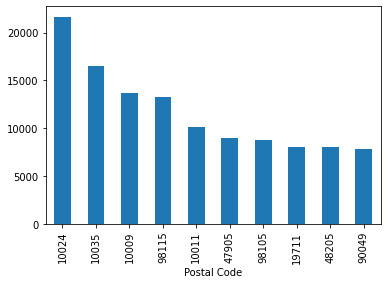

In [12]:
data2['Profit'].head(10).plot(kind='bar')

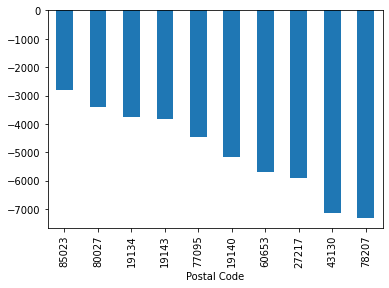

In [13]:
data2['Profit'].tail(10).plot(kind="bar")

# Customers Is Postalcode


Here we find the top 10 customers who contribute to profit

In [14]:
customers = data['Postal Code'].unique()

In [15]:
dataCustomer = data.groupby("Postal Code").sum()

In [16]:
dataCustomer2 = dataCustomer.sort_values(['Profit'], ascending=False)

In [17]:
dataCustomer2.head()

,Sales,Quantity,Discount,Profit
Postal Code,,,,
10024,78697.182,840,14.9,21653.7248
10035,77357.885,953,12.5,16533.8669
10009,54761.496,848,12.5,13697.0019
98115,41160.908,426,7.6,13303.8755
10011,45551.598,776,11.5,10152.3901


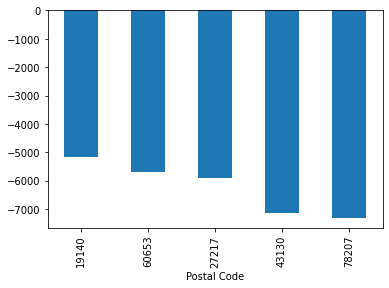

In [18]:
dataCustomer2['Profit'].tail().plot(kind='bar')


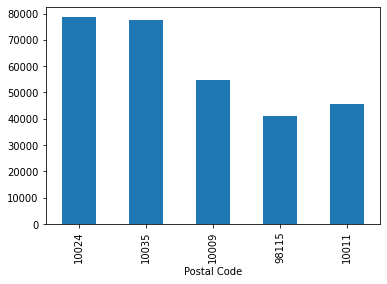

In [73]:
dataCustomer2['Sales'].head().plot(kind='bar')

The top 10 customers who contribute to making the highest loss of profit.

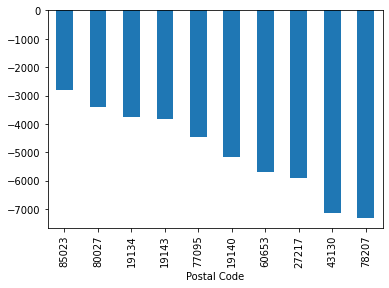

In [20]:
dataCustomer2["Profit"].tail(10).plot(kind="bar")

**Plotting Sales and Profit.**

In [43]:
dataCustomer3 = dataCustomer2[["Profit","Sales"]].tail()

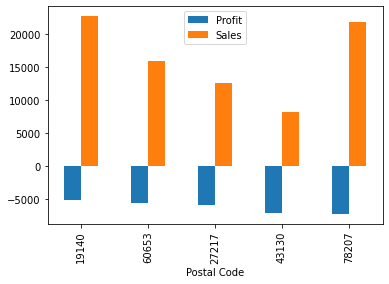

In [44]:
dataCustomer3.plot(kind="bar")

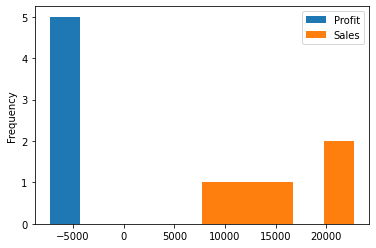

In [45]:
dataCustomer3.plot(kind='hist')

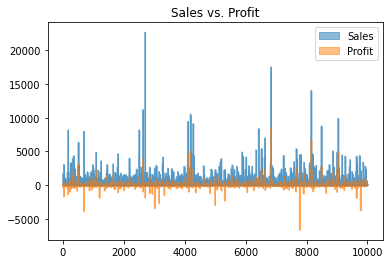

In [46]:
data[["Sales","Profit"]].plot.area(stacked=False,title="Sales vs. Profit")

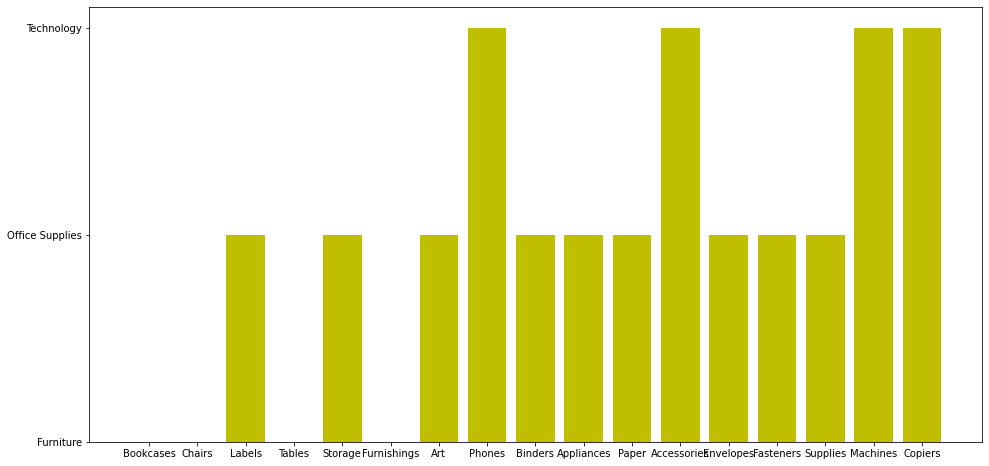

In [47]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='y')
plt.show()

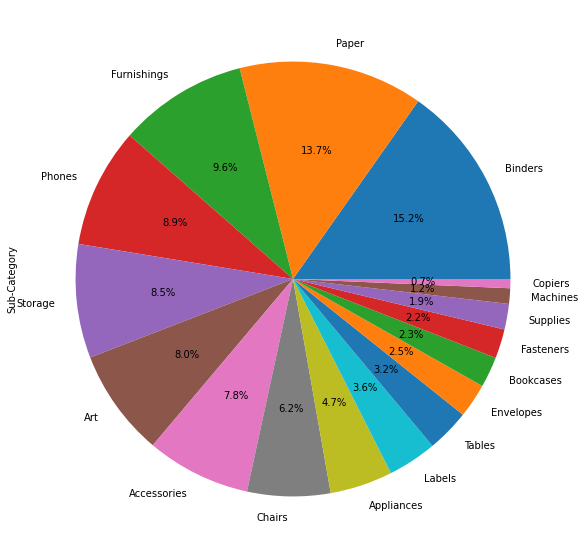

In [48]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

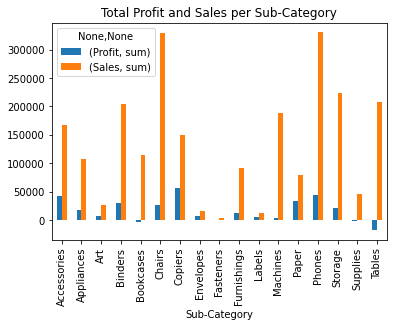

In [49]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

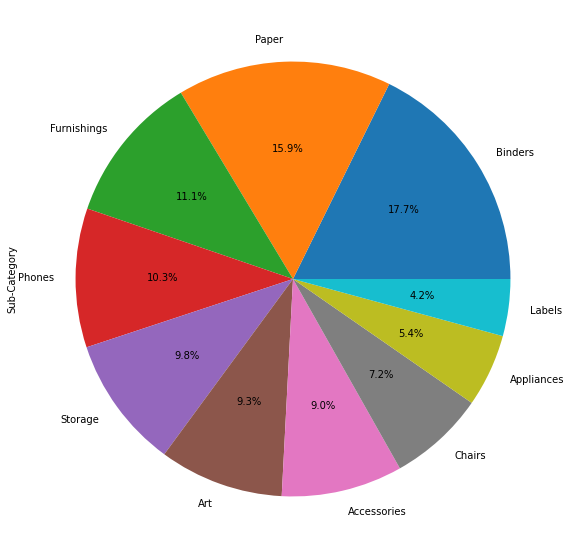

In [50]:
#Distribution of Top 10 Products
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

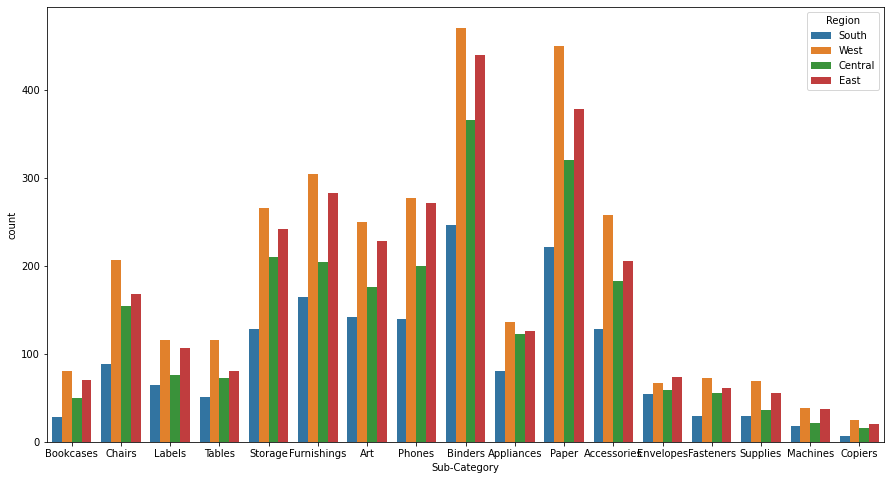

In [51]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

In [52]:
#Top 10 customers who order frequently
df_top10=df['Postal Code'].value_counts().head(10)
df_top10

10035    263
10024    230
10009    229
94122    203
10011    193
94110    166
98105    165
19134    160
98103    151
90049    151
Name: Postal Code, dtype: int64

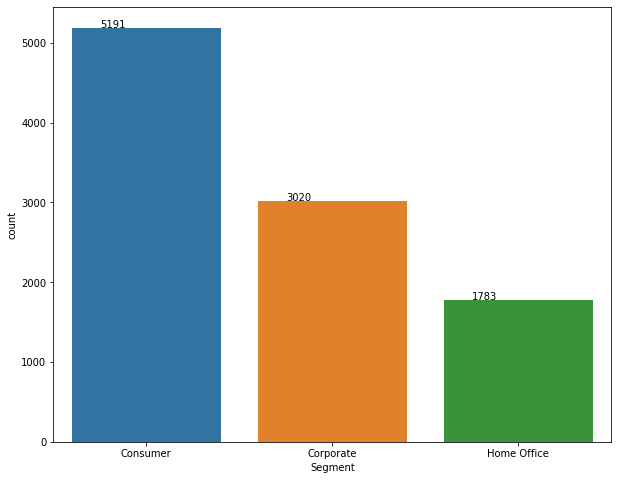

In [53]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

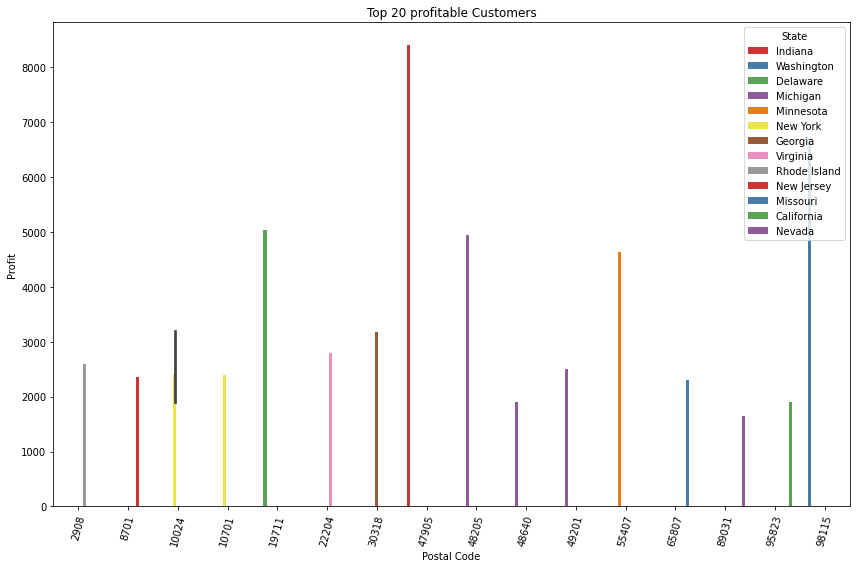

In [54]:
#Top 20 Customers who benefitted the store
sortedTop20 = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Postal Code', y='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [35]:
#number of unique orders
df['Postal Code'].nunique()

631

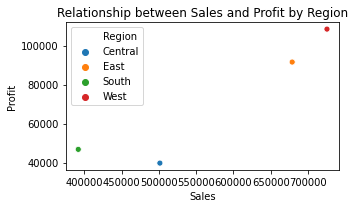

In [61]:
#Relationship between sales and profit -- use scatter plot
regionwiseSalesAndProfit = df.groupby("Region").agg({"Sales":np.sum, "Profit": np.sum})
regionwiseSalesAndProfit
fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
p = sns.scatterplot(x="Sales", y="Profit", hue=regionwiseSalesAndProfit.index, data=regionwiseSalesAndProfit) # kind="scatter")
ax.set_title("Relationship between Sales and Profit by Region")
plt.tight_layout()
plt.show()

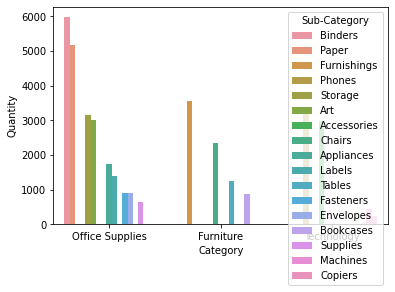

In [78]:
# sales by product Category, Sub-category
sale_category = df.groupby(["Category","Sub-Category"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False)
sale_category
sns.barplot(x = "Category",     # Data is groupedby this variable
            hue="Sub-Category",
            y= "Quantity",          
            data=sale_category)

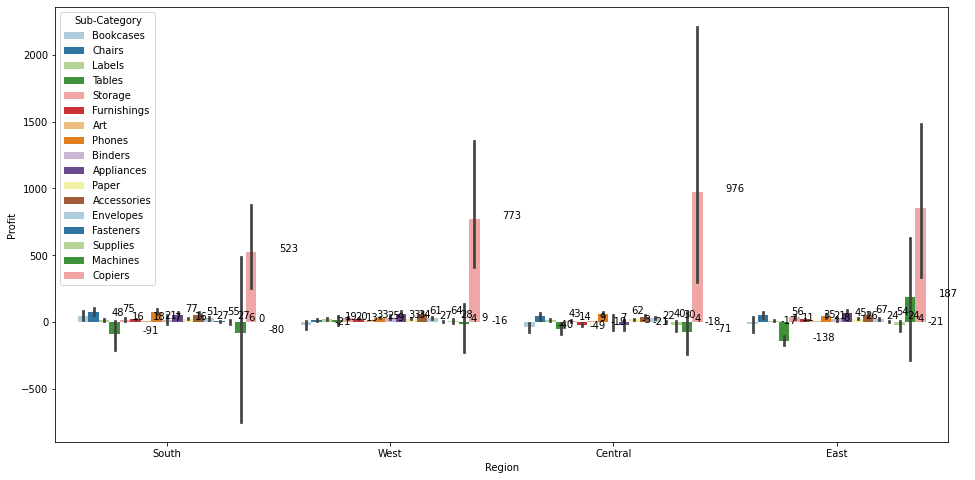

In [88]:
#Calculating Profit gained in each Category
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('Region','Profit',hue='Sub-Category',palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

In [68]:
#Year-wise sales and profit
df["Postal Code"] = pd.to_datetime(df["Postal Code"])
df["IDS"] = df["Postal Code"].dt.year
yearwiseSalesAndProfit = df.groupby("ID").agg({"Sales":np.sum, "Profit": np.sum})
yearwiseSalesAndProfit


,Sales,Profit
ID,,
1970,2.297201e+06,286397.0217


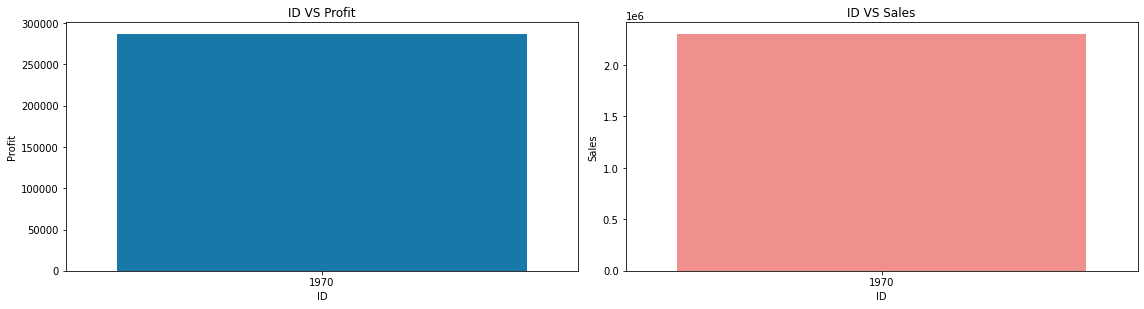

In [70]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(221)
p=sns.barplot(x=yearwiseSalesAndProfit.index,y="Profit", data=yearwiseSalesAndProfit, palette="winter", ax=ax)
ax.set_title("ID VS Profit")
ax.set_xticklabels(p.get_xticklabels(), rotation=0)
ax = fig.add_subplot(222)
p=sns.barplot(x=yearwiseSalesAndProfit.index,y="Sales", data=yearwiseSalesAndProfit, palette="spring", ax=ax)
ax.set_title("ID VS Sales")
ax.set_xticklabels(p.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

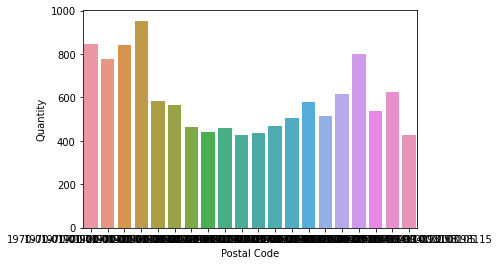

In [80]:
# top 10 products
sale_Products = df.groupby(["Postal Code"])['Quantity'].aggregate(np.sum).reset_index().sort_values('Quantity',ascending = False).head(20)
sns.barplot(x = "Postal Code",     # Data is groupedby this variable
            y= "Quantity",          
            data=sale_Products)

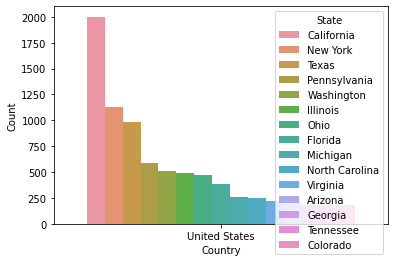

In [81]:
#for APAC, the largest # of customers are basd out of Oceania, followed by Southeast Asia
#for US, the largest # of customers are based out of Western Region followed by East
#8.Distribution of  Customers by Country & State - top 15
Customers_Country = pd.DataFrame({'Count' : df.groupby(["Country","State"]).size()}).reset_index().sort_values('Count',ascending = False).head(15)
Customers_Country

sns.barplot(x = "Country",     # Data is groupedby this variable
            y= "Count",  
            hue="State",
            data = Customers_Country.sort_values('Country')
            )

# New Section